# Importing Dependices

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Preprocessing

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_train.head()

<ipython-input-7-d310408c6a1c>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("/content/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df_train.shape

(100000, 28)

In [ ]:
# statistical info about numerical features only
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
df_train.describe(include=object).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [ ]:
df =df_train.copy()

# Data Cleaning, Data type fix and replaceing Null values

In [ ]:
#checking Duplicated Values
df.duplicated().any()

False

In [ ]:
df['Customer_ID'].isnull().sum()

0

In [ ]:
df['Customer_ID'].describe()

,Customer_ID
count,100000
unique,12500
top,CUS_0xd40
freq,8


In [ ]:
#dropping unnecessary columns
df_1 = df.drop(columns=['ID','Name','SSN'])

Detect strange values (in those columns which have string) apart from the NaN Values and convert them to NaN.

In [ ]:
df_1.describe(include="O").columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
object_col = df_1.describe(include="O").columns

In [ ]:
object_col

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
for i in object_col :
  print(f"------------{i}-------------")
  print(df_1[i].value_counts())
  print("\n")

------------Customer_ID-------------
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64


------------Month-------------
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


------------Age-------------
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64


------------Occupation-------------
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor          

In [ ]:
# Clear strange values apart from the NaN Values
def text_cleaning(data):
  if data is np.NaN or not isinstance(data,str):
    return data
  else :
    return str(data).strip("_ ,")

In [ ]:
df_1 = df_1.applymap(text_cleaning)

<ipython-input-22-68a2cda089ce>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_1 = df_1.applymap(text_cleaning)


In [ ]:
df_1 = df_1.replace(["","nan","!@9#%8"],np.NaN)
# "!@9#%8" was in payment behiaviour column

In [ ]:
def missing_data(dataframe):
  dataframe_copy = dataframe.copy()
  dataframe_copy = dataframe_copy.isnull().sum().reset_index()
  dataframe_copy.columns = ['Features','Null_Values']
  total_data = dataframe.shape[0]
  dataframe_copy["%_age"] = dataframe_copy['Null_Values'] / total_data * 100
  return dataframe_copy[dataframe_copy["Null_Values"]!=0]

In [ ]:
missing_data(df_1)

,Features,Null_Values,%_age
3,Occupation,7062,7.062
5,Monthly_Inhand_Salary,15002,15.002
10,Type_of_Loan,11408,11.408
12,Num_of_Delayed_Payment,7002,7.002
13,Changed_Credit_Limit,2091,2.091
14,Num_Credit_Inquiries,1965,1.965
15,Credit_Mix,20195,20.195
18,Credit_History_Age,9030,9.030
21,Amount_invested_monthly,4479,4.479
22,Payment_Behaviour,7600,7.600


#Data type Fix
Columns that needs to be converted to int/float

1. Age
2. Annual_Income
3. Num_of_Loan
4. Num_of_Delayed_Payment
5. Changed_Credit_Limit
6. Outstanding_Debt
7. Amount_invested_monthly
8. Monthly_Balance
9. Month
10. Customer_ID
11. Credit_History_Age

In [ ]:
df_1['Month'] = pd.to_datetime(df_1.Month,format='%B').dt.month

In [ ]:
lst1 = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
        "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly",
        "Monthly_Balance"]
for i in lst1:
    df_1[i] = df_1[i].astype(float)


In [ ]:
df_1['Customer_ID'] = df_1.Customer_ID.apply(lambda x: int(x[4:],16))

In [ ]:
# Credit_History_Age has values like this >> 22 Years and 1 Months
def month_convertor(x):
  if pd.notnull(x):
    num1 = int(x.split(" ")[0])
    num2 = int(x.split(" ")[3])
    return (num1 * 12) + num2
  else :
    return x

In [ ]:
df_1['Credit_History_Age'] = df_1['Credit_History_Age'].apply(month_convertor)

In [ ]:
df_1.groupby("Customer_ID")["Credit_History_Age"].apply(list)

,Credit_History_Age
Customer_ID,
1006,"[182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188..."
1007,"[346.0, 347.0, 348.0, 349.0, 350.0, nan, 352.0..."
1008,"[292.0, 293.0, 294.0, nan, 296.0, 297.0, 298.0..."
1009,"[331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337..."
1011,"[179.0, 180.0, nan, 182.0, 183.0, 184.0, 185.0..."
...,...
50984,"[157.0, 158.0, 159.0, nan, 161.0, 162.0, nan, ..."
50990,"[70.0, 71.0, 72.0, nan, nan, 75.0, 76.0, 77.0]"
50992,"[159.0, 160.0, 161.0, 162.0, 163.0, nan, 165.0..."


In [ ]:
len(df_1.groupby("Customer_ID")["Type_of_Loan"].apply(list)[1006])

8

1. Understand that each customer (say customer 1006) has come multiple times(8 times) in the dataset (each time a new entry has been made by Bureu)
2. Each element in the list corresponds to value in its each occurence.

In [ ]:
df_1[df_1['Customer_ID'] == 1006 ]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
14744,1006,1,37.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,10.0,10.66,NaN,Standard,1941.73,37.501111,182.0,Yes,27.442089,45.301068,High_spent_Medium_value_payments,310.391676,Poor
14745,1006,2,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,12.0,10.66,8.0,Standard,1941.73,34.712193,183.0,Yes,27.442089,90.078423,Low_spent_Medium_value_payments,295.614321,Poor
14746,1006,3,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,12.0,10.66,8.0,Standard,1941.73,32.190497,184.0,Yes,27.442089,61.732715,Low_spent_Small_value_payments,333.960030,Poor
14747,1006,4,8153.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,13.0,10.66,8.0,Standard,1941.73,33.725603,185.0,Yes,27.442089,56.494982,High_spent_Small_value_payments,309.197763,Poor
14748,1006,5,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,NaN,10.66,8.0,Standard,1941.73,38.755270,186.0,Yes,27.442089,51.726244,Low_spent_Large_value_payments,323.966500,Poor
14749,1006,6,38.0,NaN,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,12.0,10.66,8.0,NaN,1941.73,27.197484,187.0,Yes,27.442089,60.828288,NaN,334.864456,Poor
14750,1006,7,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,11.0,10.66,8.0,Standard,1941.73,23.924414,188.0,Yes,27.442089,95.648648,Low_spent_Large_value_payments,280.044097,Poor
14751,1006,8,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,"Credit-Builder Loan, and Payday Loan",48,12.0,10.66,8.0,Standard,1941.73,25.812502,189.0,Yes,32972.000000,66.718248,Low_spent_Small_value_payments,328.974496,Poor


Special column > Type_of_Loan

We have to convert "Type_of_Loan" in comma sepeared values so that when we can make one-hot vector

In [ ]:
def type_of_loan(x):
  if pd.notna(x):
    x = x.lower().replace("and ","")
    x = x.replace(", ",",")
    x = x.strip()
    return x
  else :
    return x

In [ ]:
df_1['Type_of_Loan'] = df_1["Type_of_Loan"].apply(type_of_loan)

In [ ]:
unique_loan =[]
for each_row in df_1['Type_of_Loan'].dropna():
  for each_loan in each_row.split(","):
    if each_loan not in unique_loan:
      unique_loan.append(each_loan)

unique_loan =  dict(enumerate(sorted(unique_loan)))
unique_loan

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

In [ ]:
def group_mode(dataframe,group_by,column):
  # Calculate the mode for each group
  mode_by_group = dataframe.groupby(group_by)[column].transform(lambda x : x.mode()[0] if not x.mode().empty else np.NaN)
  # Replace missing values in the column with the group mode{}
  result = dataframe[column].fillna(mode_by_group)
  return result

In [ ]:
# before
df_1.groupby("Customer_ID")["Occupation"].apply(list)

,Occupation
Customer_ID,
1006,"[Journalist, Journalist, Journalist, Journalis..."
1007,"[Manager, Manager, nan, Manager, Manager, Mana..."
1008,"[Developer, Developer, Developer, Developer, D..."
1009,"[Accountant, nan, Accountant, Accountant, Acco..."
1011,"[Writer, Writer, Writer, Writer, nan, Writer, ..."
...,...
50984,"[Mechanic, nan, Mechanic, Mechanic, Mechanic, ..."
50990,"[Lawyer, Lawyer, nan, Lawyer, Lawyer, Lawyer, ..."
50992,"[Journalist, Journalist, Journalist, Journalis..."


In [ ]:
df_1['Occupation'] = group_mode(df_1,"Customer_ID",column="Occupation")

In [ ]:
# After
df_1.groupby("Customer_ID")["Occupation"].apply(list)

,Occupation
Customer_ID,
1006,"[Journalist, Journalist, Journalist, Journalis..."
1007,"[Manager, Manager, Manager, Manager, Manager, ..."
1008,"[Developer, Developer, Developer, Developer, D..."
1009,"[Accountant, Accountant, Accountant, Accountan..."
1011,"[Writer, Writer, Writer, Writer, Writer, Write..."
...,...
50984,"[Mechanic, Mechanic, Mechanic, Mechanic, Mecha..."
50990,"[Lawyer, Lawyer, Lawyer, Lawyer, Lawyer, Lawye..."
50992,"[Journalist, Journalist, Journalist, Journalis..."


In [ ]:
# Before
df_1.groupby("Customer_ID")["Type_of_Loan"].apply(list)

,Type_of_Loan
Customer_ID,
1006,"[credit-builder loan,payday loan, credit-build..."
1007,"[home equity loan,mortgage loan,student loan, ..."
1008,"[nan, nan, nan, nan, nan, nan, nan, nan]"
1009,"[credit-builder loan,student loan,not specifie..."
1011,"[personal loan,auto loan,auto loan, personal l..."
...,...
50984,"[home equity loan,mortgage loan,payday loan,mo..."
50990,"[mortgage loan,auto loan,auto loan, mortgage l..."
50992,"[student loan,credit-builder loan,mortgage loa..."


In [ ]:
# group mode is not required
# since for a customer whose one instance has nan, its all instances have nan.
df_1['Type_of_Loan'].replace(np.NaN,"No Data",inplace = True)

<ipython-input-42-651fb3b0d95f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['Type_of_Loan'].replace(np.NaN,"No Data",inplace = True)


In [ ]:
#After
df_1.groupby("Customer_ID")["Type_of_Loan"].apply(list)

,Type_of_Loan
Customer_ID,
1006,"[credit-builder loan,payday loan, credit-build..."
1007,"[home equity loan,mortgage loan,student loan, ..."
1008,"[No Data, No Data, No Data, No Data, No Data, ..."
1009,"[credit-builder loan,student loan,not specifie..."
1011,"[personal loan,auto loan,auto loan, personal l..."
...,...
50984,"[home equity loan,mortgage loan,payday loan,mo..."
50990,"[mortgage loan,auto loan,auto loan, mortgage l..."
50992,"[student loan,credit-builder loan,mortgage loa..."


In [ ]:
# Before
df_1.groupby('Customer_ID')['Credit_Mix'].apply(list)

,Credit_Mix
Customer_ID,
1006,"[Standard, Standard, Standard, Standard, Stand..."
1007,"[nan, Standard, Standard, Standard, nan, Stand..."
1008,"[nan, Standard, Standard, nan, Standard, Stand..."
1009,"[Standard, nan, Standard, Standard, Standard, ..."
1011,"[nan, nan, Standard, Standard, Standard, Stand..."
...,...
50984,"[nan, Standard, nan, Standard, Standard, nan, ..."
50990,"[Standard, nan, Standard, Standard, Standard, ..."
50992,"[Standard, Standard, Standard, Standard, Stand..."


In [ ]:
df_1['Credit_Mix'] = group_mode(df_1,"Customer_ID",column="Credit_Mix")

In [ ]:
# After
df_1.groupby('Customer_ID')['Credit_Mix'].apply(list)

,Credit_Mix
Customer_ID,
1006,"[Standard, Standard, Standard, Standard, Stand..."
1007,"[Standard, Standard, Standard, Standard, Stand..."
1008,"[Standard, Standard, Standard, Standard, Stand..."
1009,"[Standard, Standard, Standard, Standard, Stand..."
1011,"[Standard, Standard, Standard, Standard, Stand..."
...,...
50984,"[Standard, Standard, Standard, Standard, Stand..."
50990,"[Standard, Standard, Standard, Standard, Stand..."
50992,"[Standard, Standard, Standard, Standard, Stand..."


Payment_Behaviour

In [ ]:
#before
df_1.groupby('Customer_ID')['Payment_Behaviour'].apply(list)

,Payment_Behaviour
Customer_ID,
1006,"[High_spent_Medium_value_payments, Low_spent_M..."
1007,"[High_spent_Medium_value_payments, High_spent_..."
1008,"[High_spent_Small_value_payments, Low_spent_La..."
1009,"[High_spent_Medium_value_payments, High_spent_..."
1011,"[High_spent_Small_value_payments, Low_spent_Sm..."
...,...
50984,"[Low_spent_Small_value_payments, Low_spent_Lar..."
50990,"[High_spent_Large_value_payments, High_spent_S..."
50992,"[Low_spent_Medium_value_payments, Low_spent_La..."


In [ ]:
# check customer id = 1009
df_1.groupby('Customer_ID')['Payment_Behaviour'].apply(list)[1009]

['High_spent_Medium_value_payments',
 'High_spent_Large_value_payments',
 'High_spent_Medium_value_payments',
 'Low_spent_Large_value_payments',
 'Low_spent_Medium_value_payments',
 'Low_spent_Large_value_payments',
 nan,
 'High_spent_Large_value_payments']

In [ ]:
df_1['Payment_Behaviour'] =  group_mode(df_1,"Customer_ID",column="Payment_Behaviour")

In [ ]:
#after
df_1.groupby('Customer_ID')['Payment_Behaviour'].apply(list)[1009]

['High_spent_Medium_value_payments',
 'High_spent_Large_value_payments',
 'High_spent_Medium_value_payments',
 'Low_spent_Large_value_payments',
 'Low_spent_Medium_value_payments',
 'Low_spent_Large_value_payments',
 'High_spent_Large_value_payments',
 'High_spent_Large_value_payments']

In [ ]:
missing_data(df_1[list(df_1.describe(include="O").columns)])

,Features,Null_Values,%_age


# Data Visualization

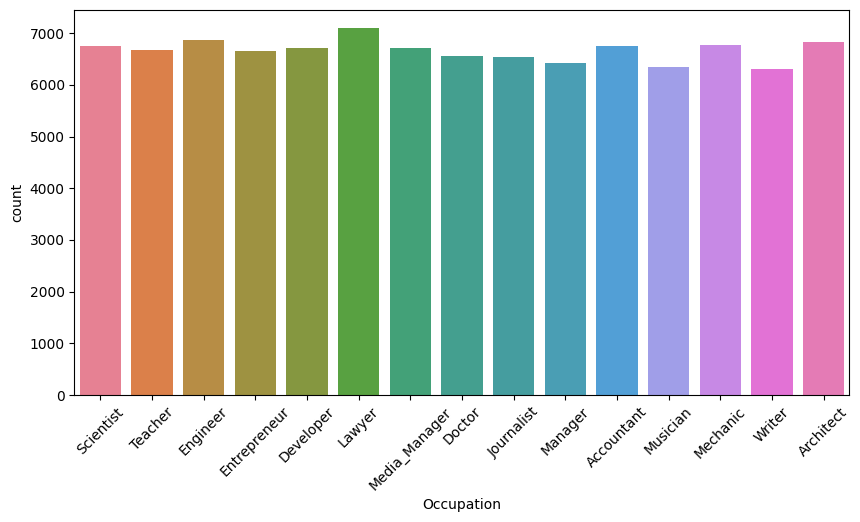

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_1, x = "Occupation",hue='Occupation')
plt.xticks(rotation=45)
plt.show()

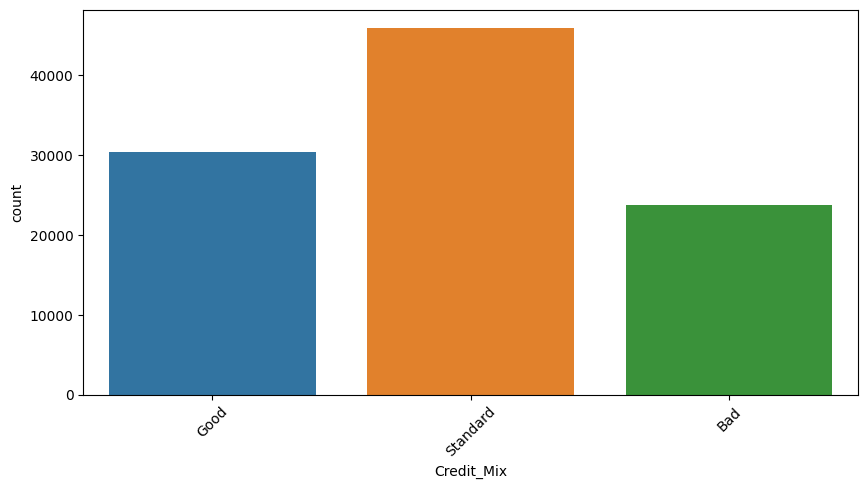

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_1, x = "Credit_Mix",hue='Credit_Mix')
plt.xticks(rotation=45)
plt.show()

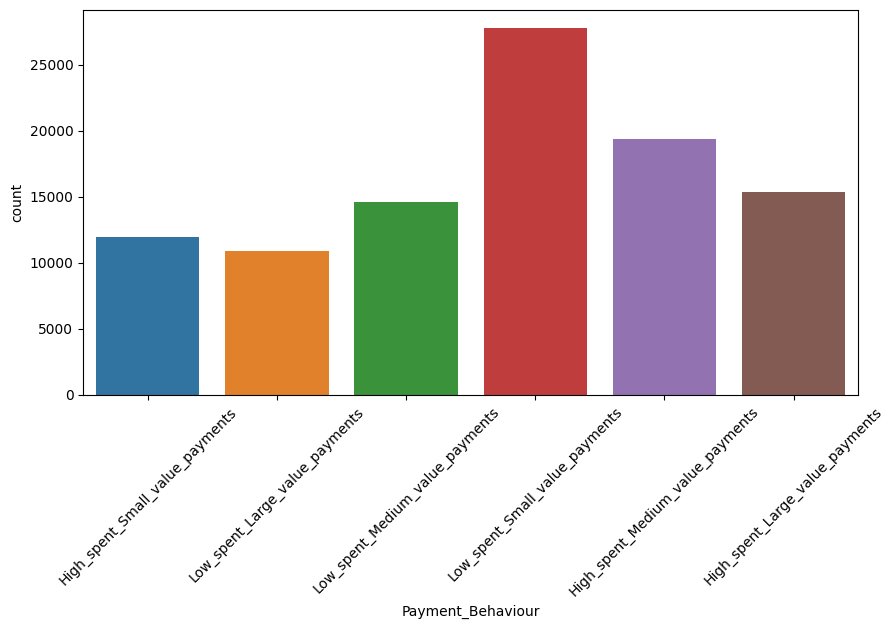

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_1, x = "Payment_Behaviour",hue='Payment_Behaviour')
plt.xticks(rotation=45)
plt.show()

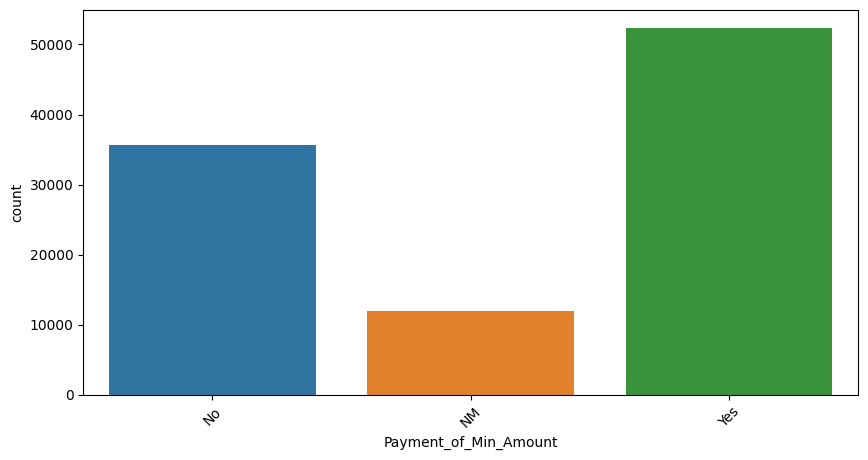

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_1, x = "Payment_of_Min_Amount",hue='Payment_of_Min_Amount')
plt.xticks(rotation=45)
plt.show()

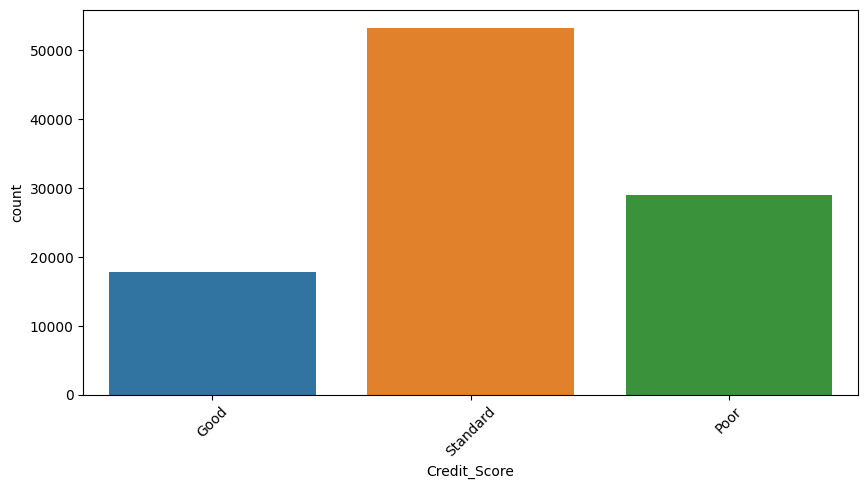

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_1, x = "Credit_Score",hue='Credit_Score')
plt.xticks(rotation=45)
plt.show()

# Numerical column

In [ ]:
def get_iqr_lower_upper(dataframe,column,multiply = 1.5):
  q1 = dataframe[column].quantile(0.25)
  q3 = dataframe[column].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - iqr * multiply
  upper = q3 + iqr * multiply
  affect = dataframe.loc[(dataframe[column]<lower)|(dataframe[column]>upper)].shape
  print("Outlier :", affect)
  return lower,upper

In [ ]:

def replace_group_outliers_fillna(dataframe, group_by, column):

  df_dropped = dataframe[dataframe[column].notna()] # drop nan values before doing anything

  df_grouped = df_dropped.groupby(group_by)[column].apply(list)  # for each customer(group) : list all the values in the column for a group

  # find groupwise mode
  df_grouped = df_grouped.apply(lambda x: stats.mode(x)[0])

  mini, maxi = df_grouped.apply([min, max])

  # assign Wrong Values to NaN
  col = dataframe[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

  mode_by_group = dataframe.groupby(group_by)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
  result = col.fillna(mode_by_group)

  return result


Age

In [ ]:

#Before
df_1.groupby("Customer_ID")["Age"].apply(list)

,Age
Customer_ID,
1006,"[37.0, 38.0, 38.0, 8153.0, 38.0, 38.0, 38.0, 3..."
1007,"[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]"
1008,"[3452.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 3..."
1009,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0]"
1011,"[43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]"
...,...
50984,"[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]"
50990,"[38.0, 38.0, 4706.0, 38.0, 38.0, 38.0, 38.0, 3..."
50992,"[23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.0, 24.0]"


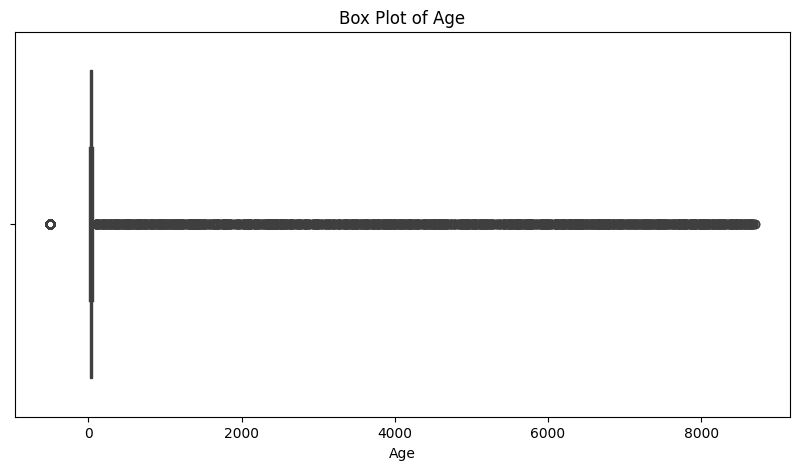

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Age")
plt.title("Box Plot of Age")
plt.show()

In [ ]:
df_1["Age"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Age")

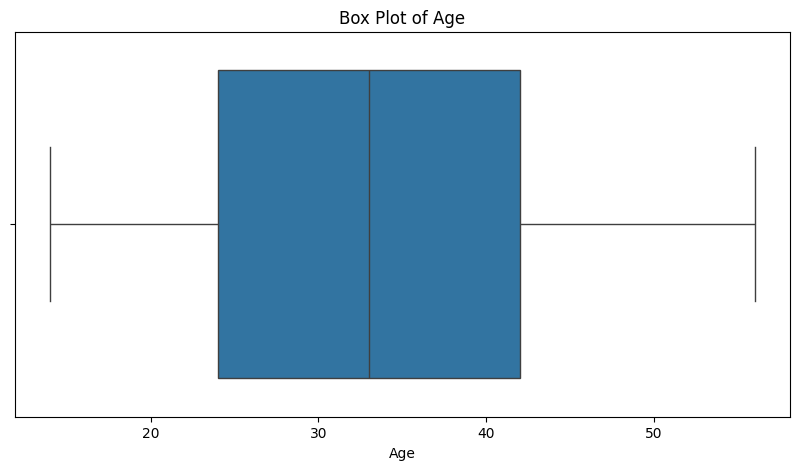

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Age")
plt.title("Box Plot of Age")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Age")

Outlier : (0, 25)


(-3.0, 69.0)

Annual_Income

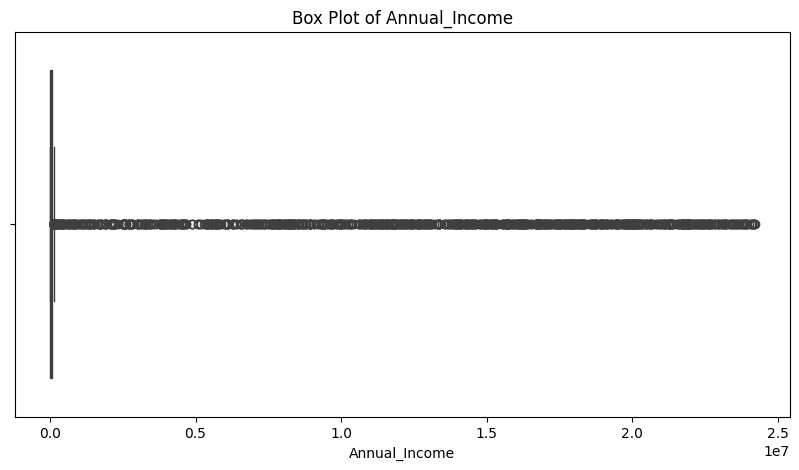

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Annual_Income")
plt.title("Box Plot of Annual_Income")
plt.show()

In [ ]:
df_1["Annual_Income"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Annual_Income")


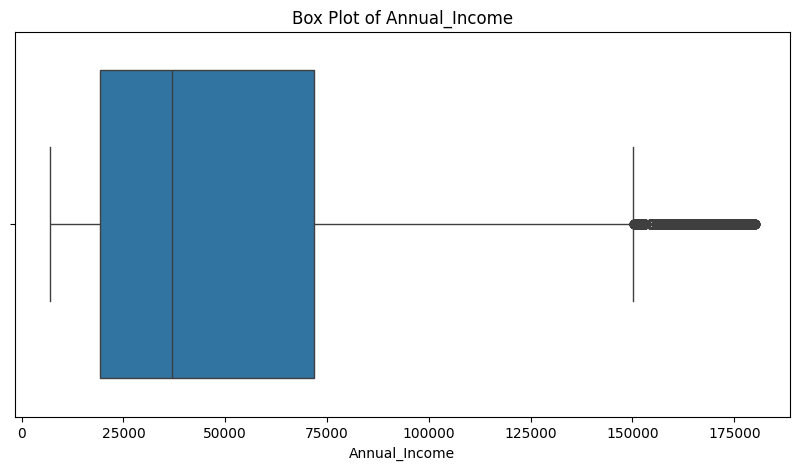

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Annual_Income")
plt.title("Box Plot of Annual_Income")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Annual_Income")

Outlier : (2000, 25)


(-59167.77374999999, 150194.21625)

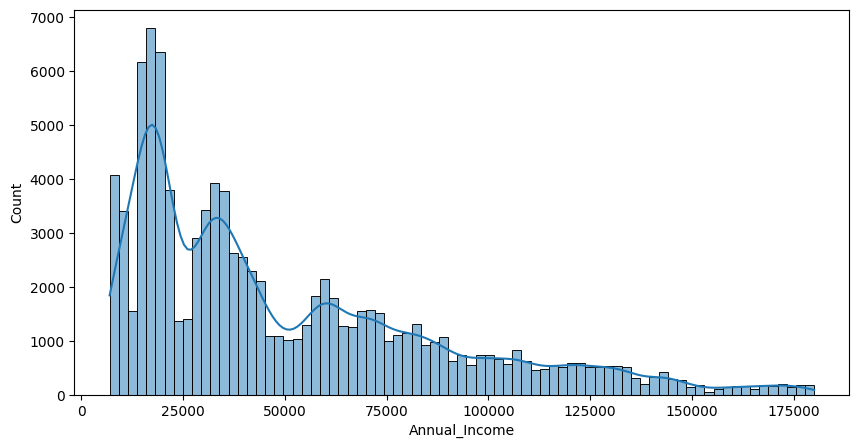

In [ ]:
plt.figure(figsize = (10,5))
sns.histplot(data = df_1, x = "Annual_Income",kde=True)
plt.show()

Monthly_Inhand_Salary

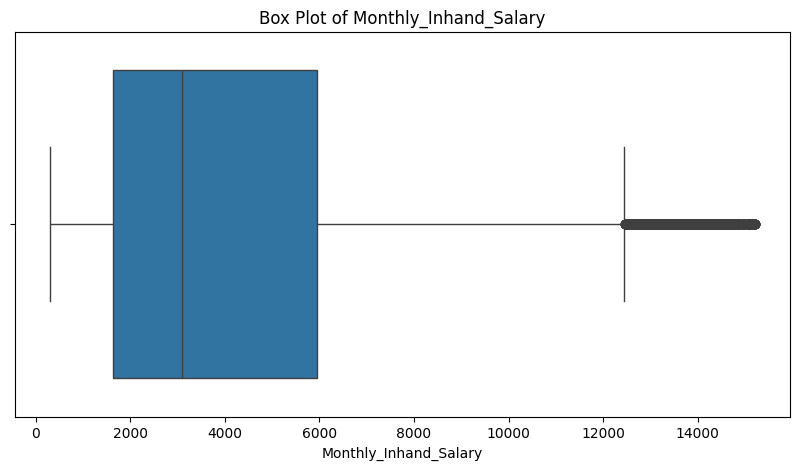

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Monthly_Inhand_Salary")
plt.title("Box Plot of Monthly_Inhand_Salary")
plt.show()

In [ ]:
df_1["Monthly_Inhand_Salary"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Monthly_Inhand_Salary")

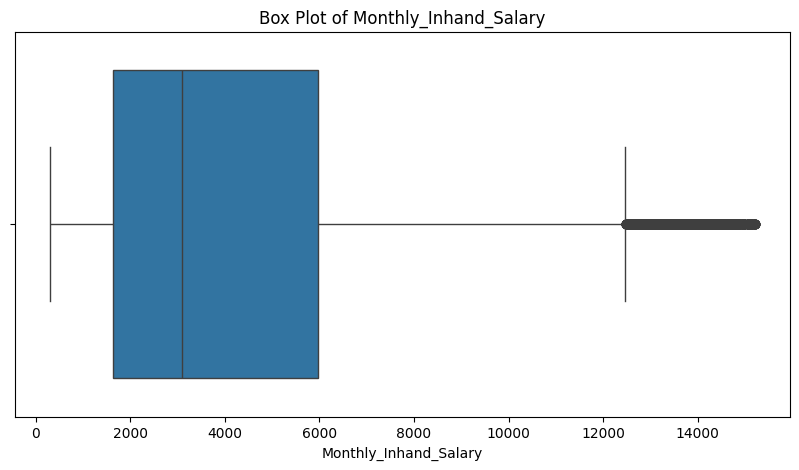

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Monthly_Inhand_Salary")
plt.title("Box Plot of Monthly_Inhand_Salary")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Monthly_Inhand_Salary")
# still has some otliers
# it seems like the replace_group_outliers_fillna function was not that effective on this column

Outlier : (2010, 25)


(-4875.552083333334, 12463.95125)

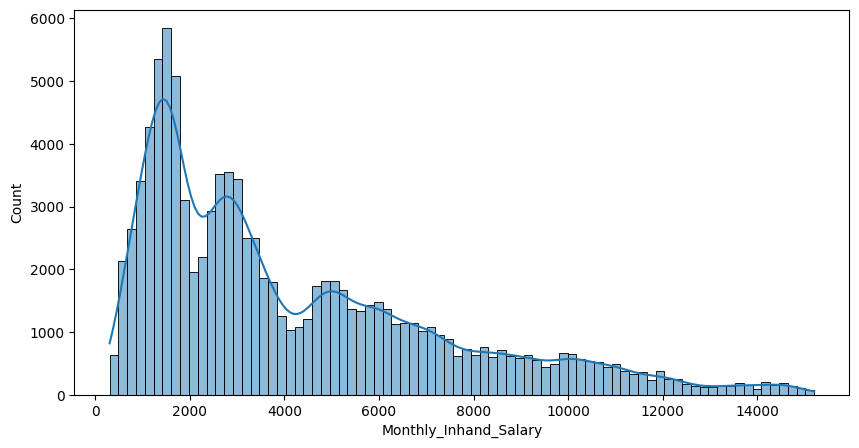

In [ ]:
plt.figure(figsize = (10,5))
sns.histplot(data = df_1, x = "Monthly_Inhand_Salary",kde=True)
plt.show()

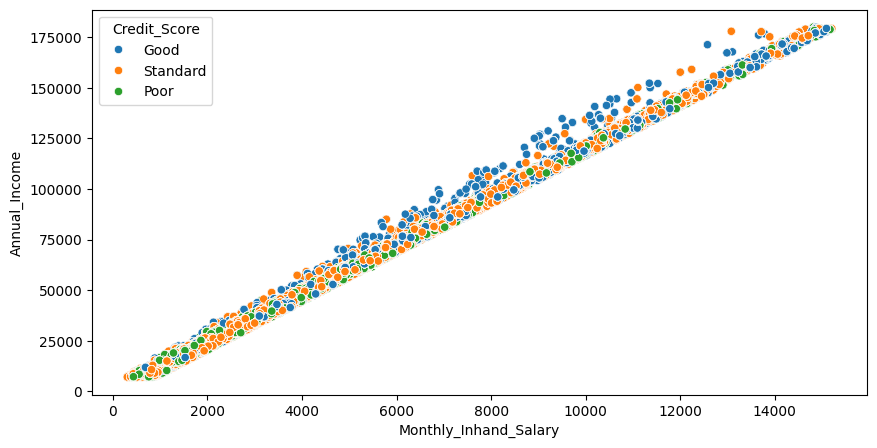

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=df_1, x="Monthly_Inhand_Salary", y="Annual_Income", hue="Credit_Score")
plt.show()
# high +ve linear corelation between features

Num_Bank_Accounts

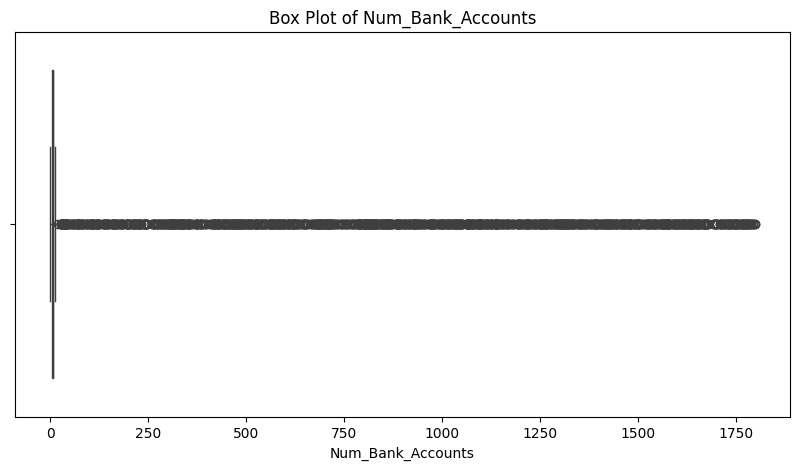

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Bank_Accounts")
plt.title("Box Plot of Num_Bank_Accounts")
plt.show()

In [ ]:
df_1["Num_Bank_Accounts"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_Bank_Accounts")


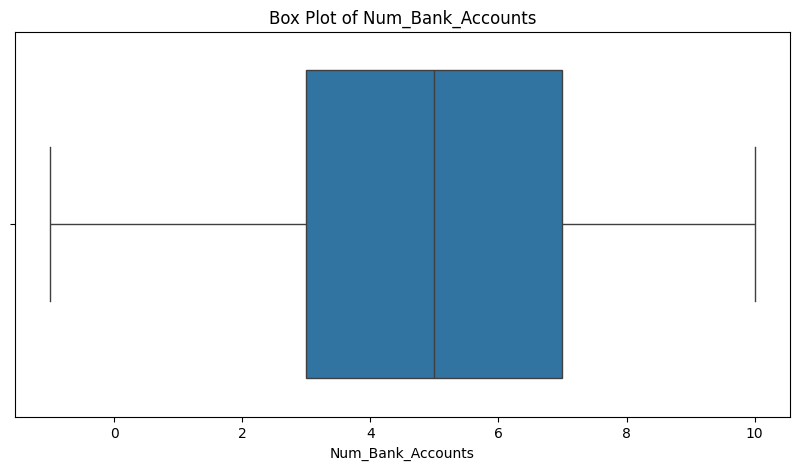

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Bank_Accounts")
plt.title("Box Plot of Num_Bank_Accounts")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Num_Bank_Accounts")
# no outliers

Outlier : (0, 25)


(-3.0, 13.0)

Num_Credit_Card

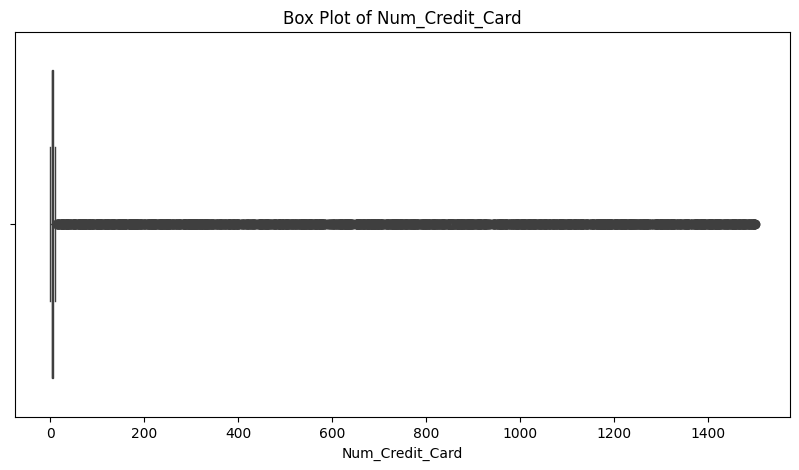

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Card")
plt.title("Box Plot of Num_Credit_Card")
plt.show()

In [ ]:
df_1["Num_Credit_Card"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_Credit_Card")

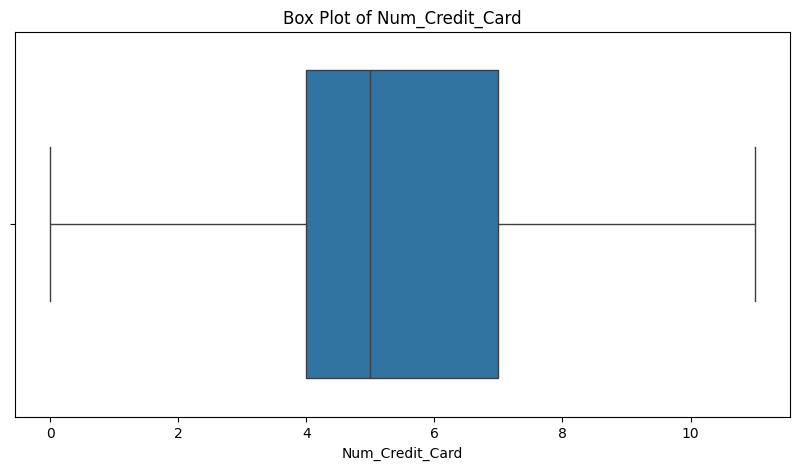

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Card")
plt.title("Box Plot of Num_Credit_Card")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Num_Credit_Card")

Outlier : (0, 25)


(-0.5, 11.5)

Interest_Rate

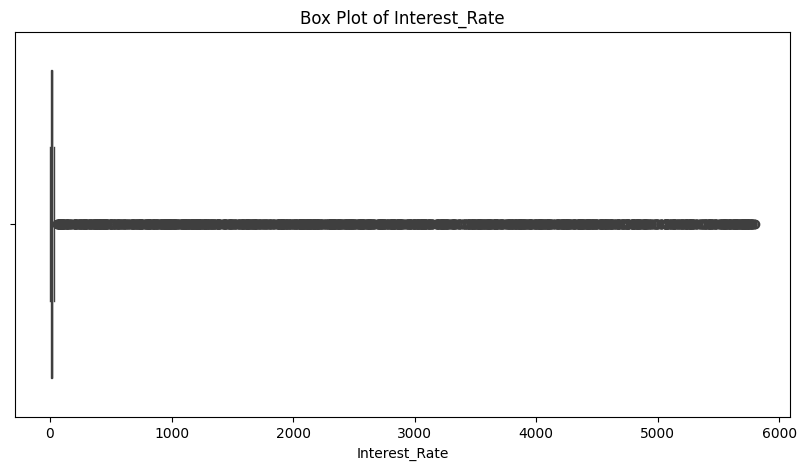

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Interest_Rate")
plt.title("Box Plot of Interest_Rate")
plt.show()

In [ ]:
df_1["Interest_Rate"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Interest_Rate")


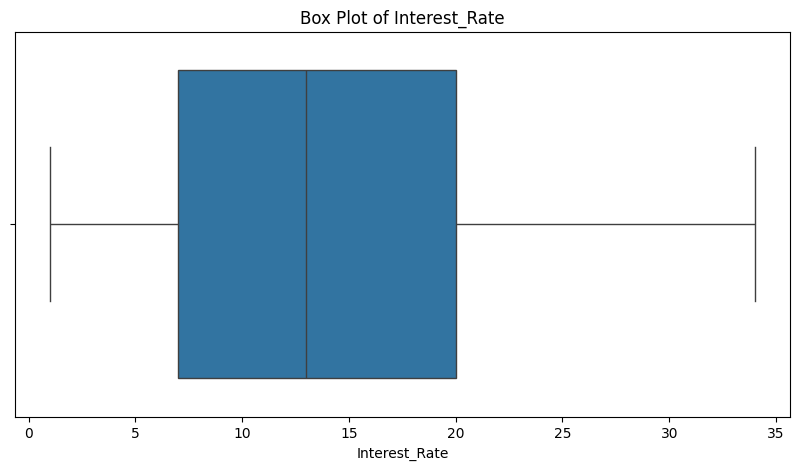

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Interest_Rate")
plt.title("Box Plot of Interest_Rate")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Interest_Rate")

Outlier : (0, 25)


(-12.5, 39.5)

Num_of_Loan

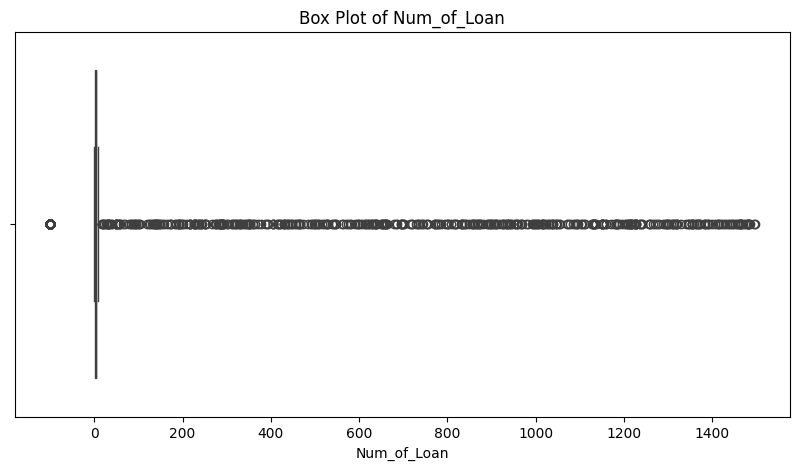

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Loan")
plt.title("Box Plot of Num_of_Loan")
plt.show()

In [ ]:
df_1["Num_of_Loan"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_of_Loan")


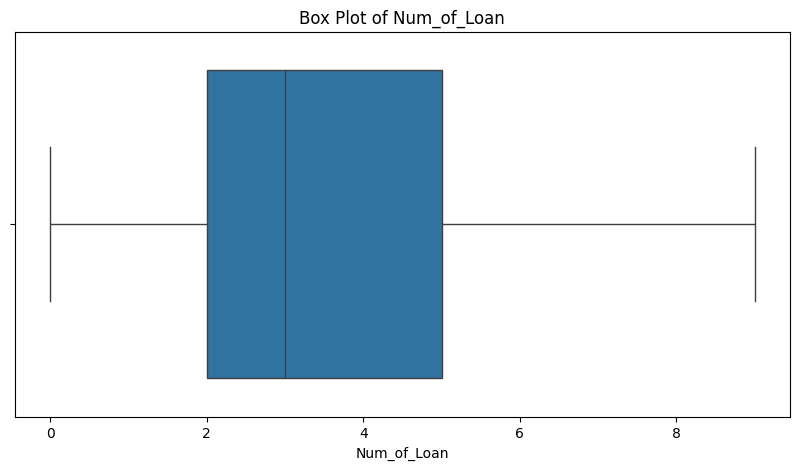

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Loan")
plt.title("Box Plot of Num_of_Loan")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Num_of_Loan")

Outlier : (0, 25)


(-2.5, 9.5)

Delay_from_due_date

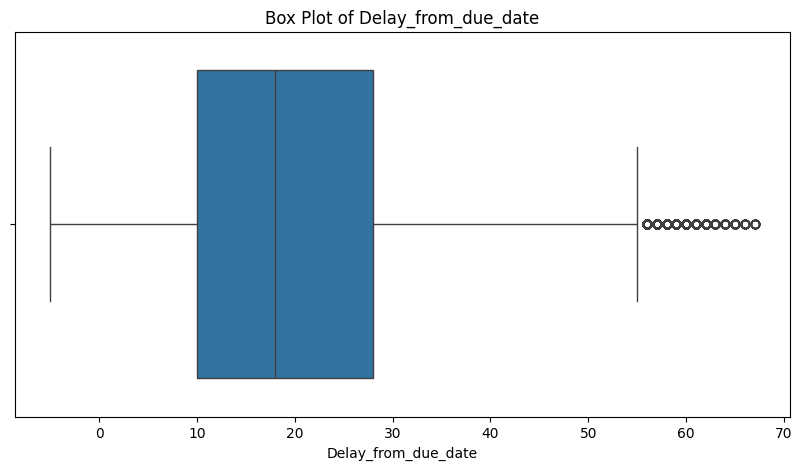

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Delay_from_due_date")
plt.title("Box Plot of Delay_from_due_date")
plt.show()

In [ ]:
df_1["Delay_from_due_date"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Delay_from_due_date")


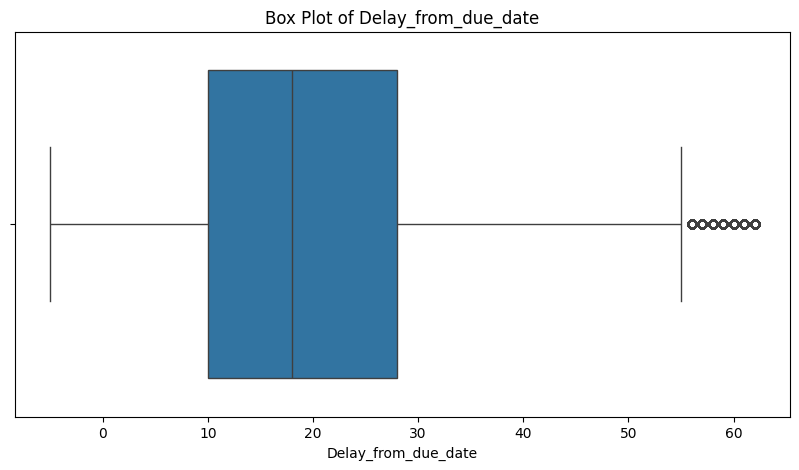

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Delay_from_due_date")
plt.title("Box Plot of Delay_from_due_date")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Delay_from_due_date")

Outlier : (4002, 25)


(-17.0, 55.0)

Num_of_Delayed_Payment

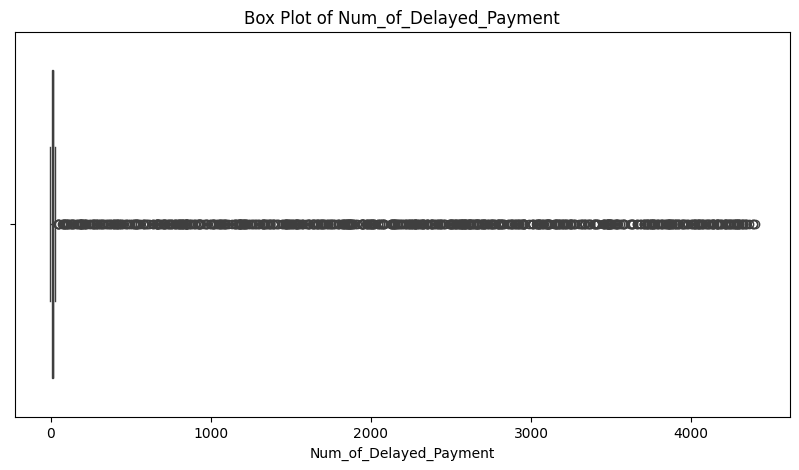

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Delayed_Payment")
plt.title("Box Plot of Num_of_Delayed_Payment")
plt.show()

In [ ]:
df_1["Num_of_Delayed_Payment"] = replace_group_outliers_fillna(df_1, "Customer_ID","Num_of_Delayed_Payment")


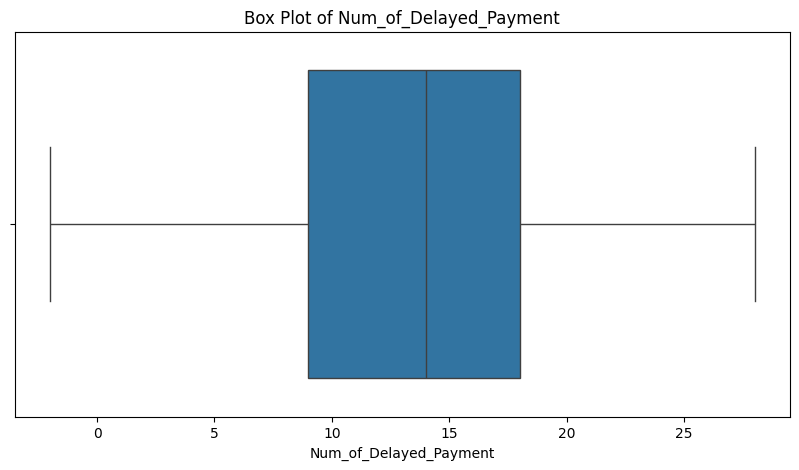

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Delayed_Payment")
plt.title("Box Plot of Num_of_Delayed_Payment")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Num_of_Delayed_Payment")

Outlier : (0, 25)


(-4.5, 31.5)

Changed_Credit_Limit

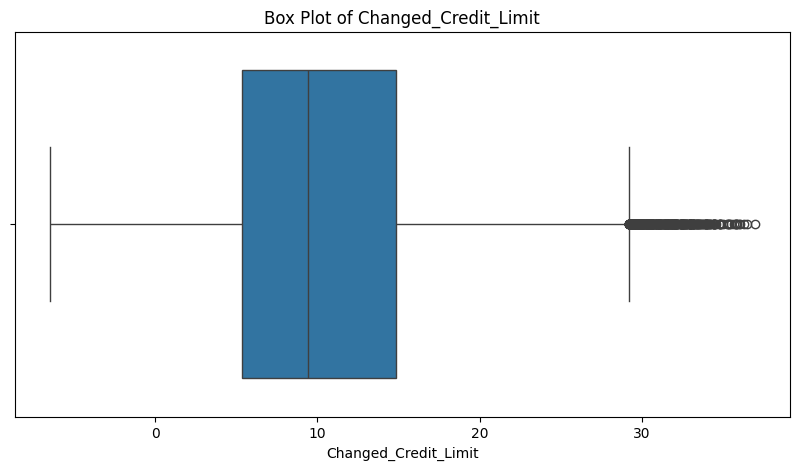

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Changed_Credit_Limit")
plt.title("Box Plot of Changed_Credit_Limit")
plt.show()

In [ ]:
df_1["Changed_Credit_Limit"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Changed_Credit_Limit")


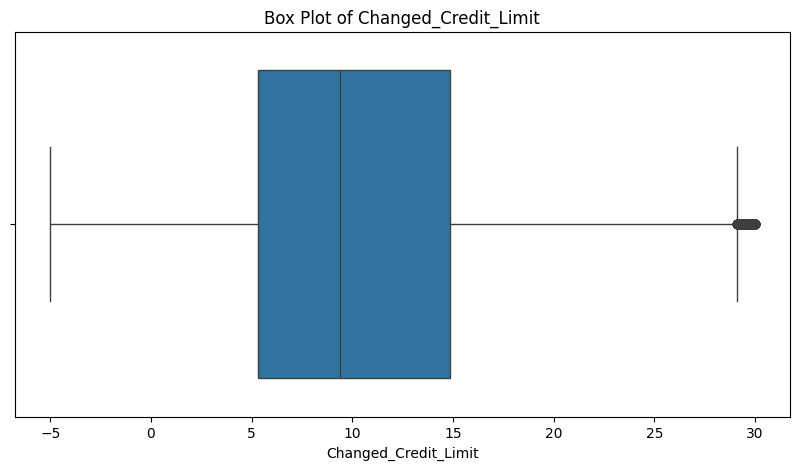

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Changed_Credit_Limit")
plt.title("Box Plot of Changed_Credit_Limit")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Changed_Credit_Limit")

Outlier : (522, 25)


(-8.925, 29.115000000000002)

Num_Credit_Inquiries

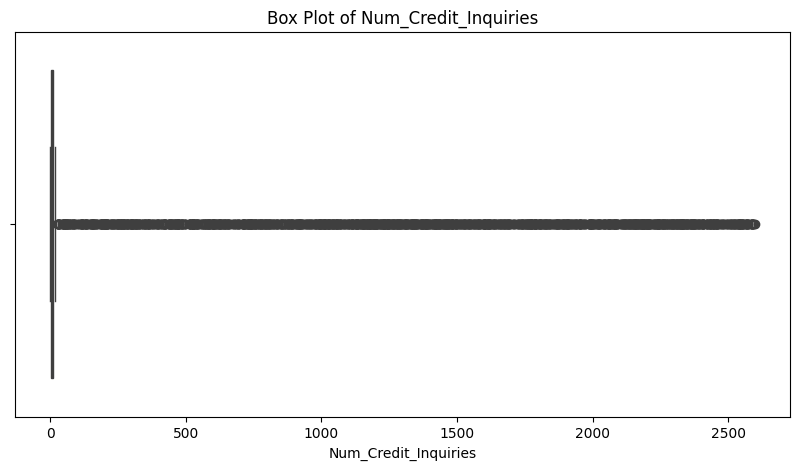

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Inquiries")
plt.title("Box Plot of Num_Credit_Inquiries")
plt.show()

In [ ]:
df_1["Num_Credit_Inquiries"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_Credit_Inquiries")


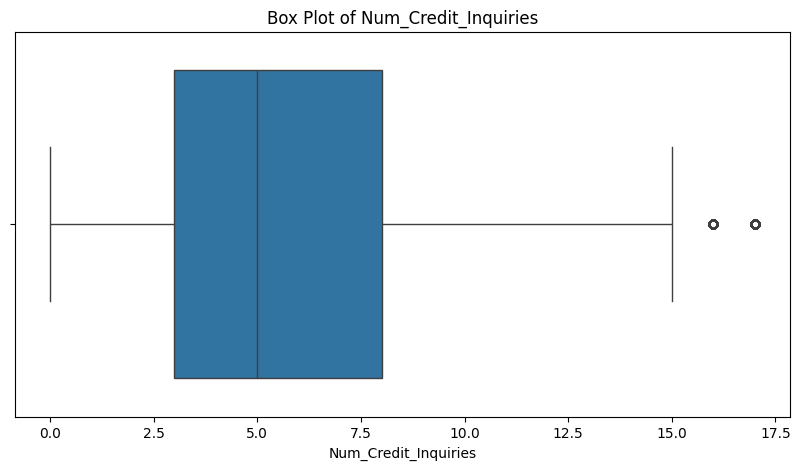

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Inquiries")
plt.title("Box Plot of Num_Credit_Inquiries")
plt.show()

Outstanding_Debt

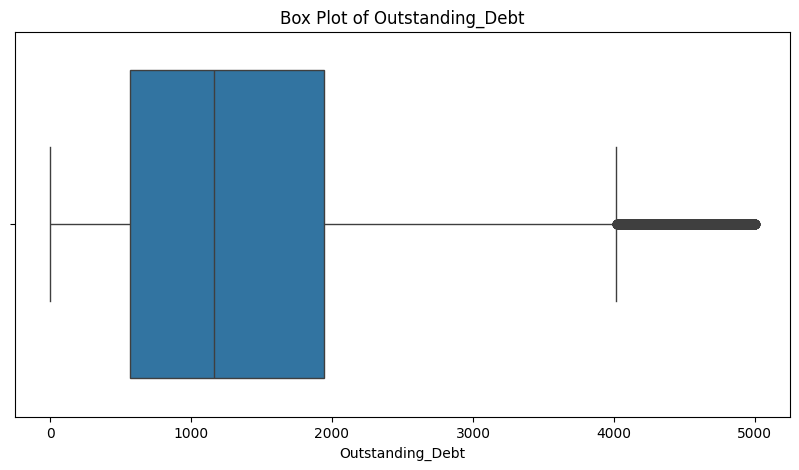

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Outstanding_Debt")
plt.title("Box Plot of Outstanding_Debt")
plt.show()

In [ ]:
df_1["Outstanding_Debt"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Outstanding_Debt")


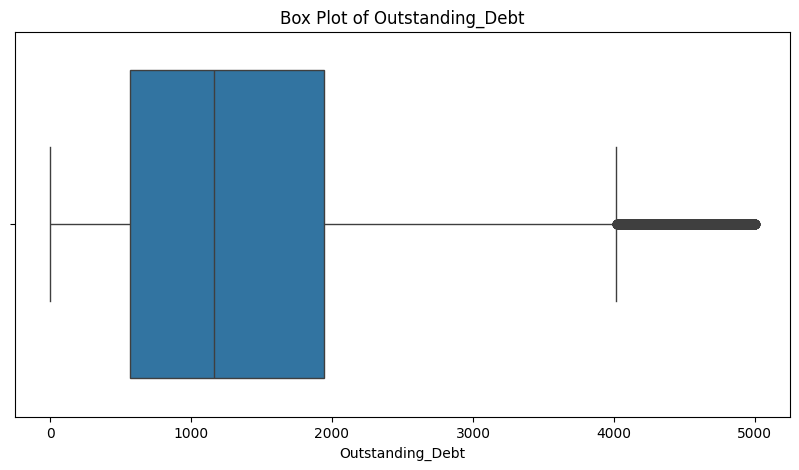

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Outstanding_Debt")
plt.title("Box Plot of Outstanding_Debt")
plt.show()

Credit_Utilization_Ratio

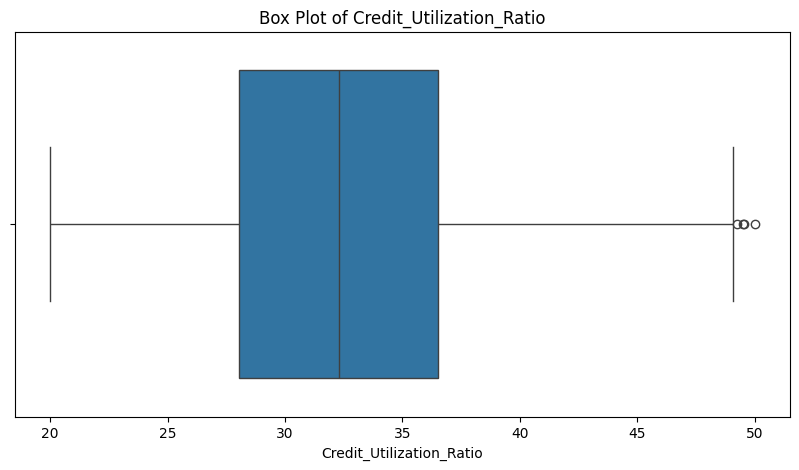

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Credit_Utilization_Ratio")
plt.title("Box Plot of Credit_Utilization_Ratio")
plt.show()

In [ ]:
df_1["Credit_Utilization_Ratio"].isnull().sum()

0

Credit_History_Age

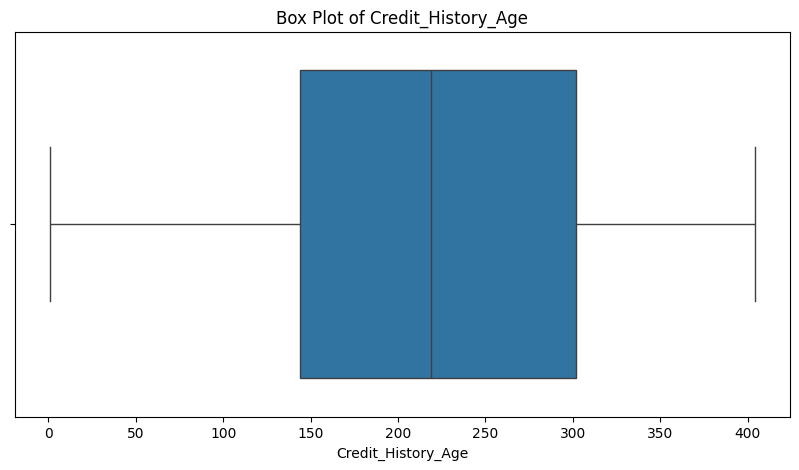

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Credit_History_Age")
plt.title("Box Plot of Credit_History_Age")
plt.show()

In [ ]:
df_1['Credit_History_Age'] = df_1.groupby("Customer_ID", group_keys=False)["Credit_History_Age"].apply(lambda x: x.interpolate().bfill().ffill())


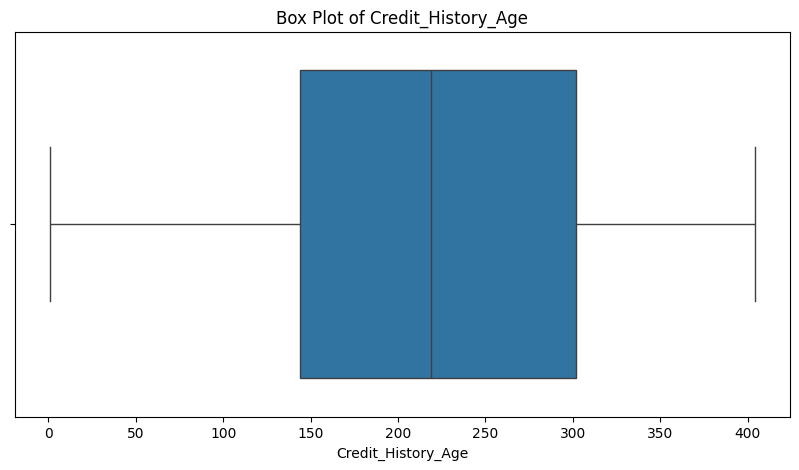

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Credit_History_Age")
plt.title("Box Plot of Credit_History_Age")
plt.show()

Total_EMI_per_month

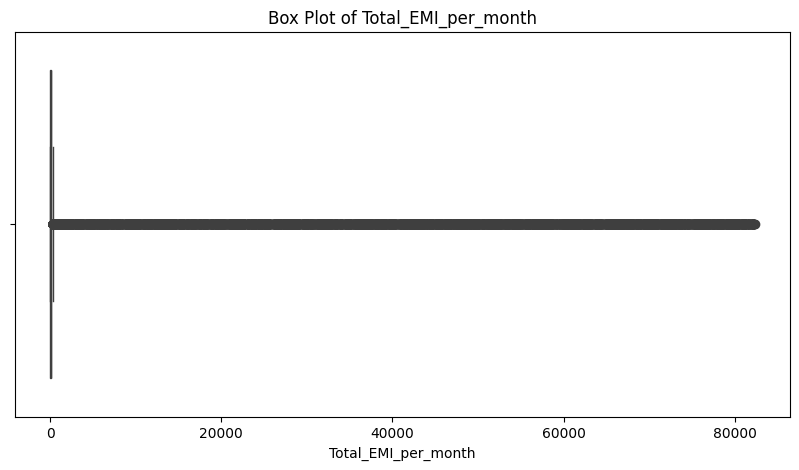

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Total_EMI_per_month")
plt.title("Box Plot of Total_EMI_per_month")
plt.show()

In [ ]:
df_1["Total_EMI_per_month"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Total_EMI_per_month")


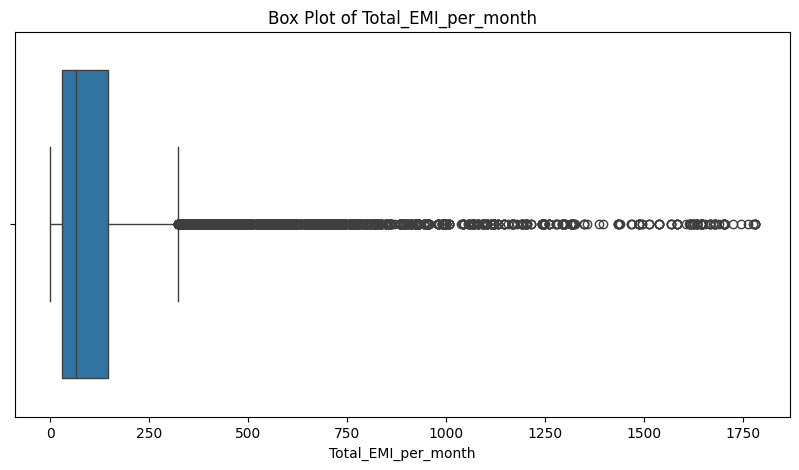

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Total_EMI_per_month")
plt.title("Box Plot of Total_EMI_per_month")
plt.show()

In [ ]:
get_iqr_lower_upper(df_1, "Total_EMI_per_month")

Outlier : (5052, 25)


(-147.48001686549193, 323.76380380888094)

Amount_invested_monthly

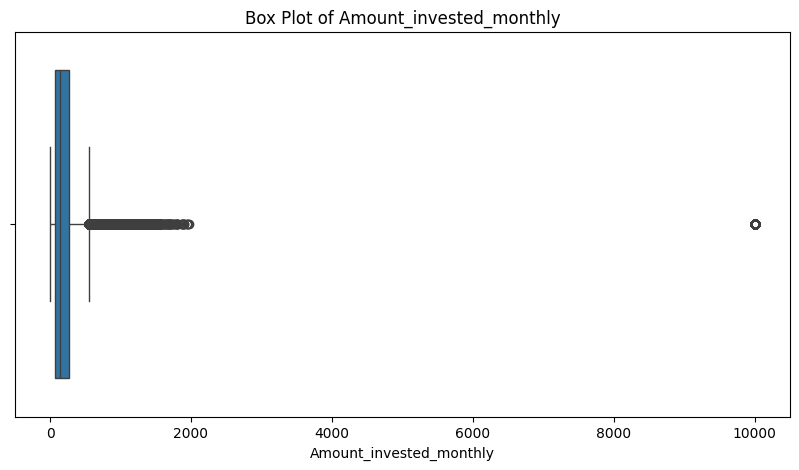

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Amount_invested_monthly")
plt.title("Box Plot of Amount_invested_monthly")
plt.show()

In [ ]:
df_1["Amount_invested_monthly"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Amount_invested_monthly")


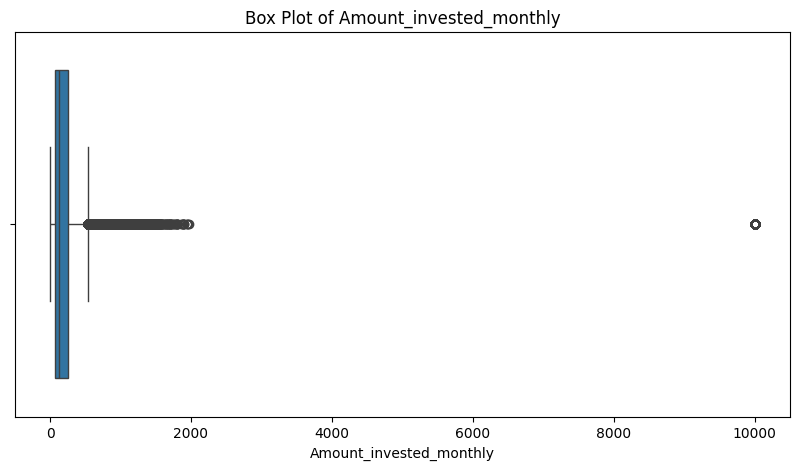

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Amount_invested_monthly")
plt.title("Box Plot of Amount_invested_monthly")
plt.show()

Monthly_Balance

In [ ]:
df_1["Monthly_Balance"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Monthly_Balance")


In [ ]:

missing_data(df_1)

,Features,Null_Values,%_age


Num_Bank_Accounts, Delay_from_due_date, Num_of_Delayed_Payment, Monthly_Balance have negative strange number Amount_invested_monthly have positive strange number

Num_Bank_Accounts : Cannot be less than 0

In [ ]:
df_1[df_1["Customer_ID"]==22931]
# see this customer has negative bank account which cant be possible

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55632,22931,1,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,8.0,3.0,9.11,0.0,Good,644.57,37.488977,281.0,No,16.483566,187.641645,Low_spent_Small_value_payments,317.609039,Standard
55633,22931,2,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,5.0,3.0,9.11,0.0,Good,644.57,30.230648,282.0,No,16.483566,143.322972,High_spent_Small_value_payments,331.927711,Standard
55634,22931,3,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,12.0,3.0,9.11,0.0,Good,644.57,38.822428,283.0,No,16.483566,60.681956,High_spent_Small_value_payments,414.568728,Standard
55635,22931,4,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,8.0,3.0,9.11,0.0,Good,644.57,36.351893,284.0,NM,16.483566,54.569799,High_spent_Large_value_payments,400.680884,Standard
55636,22931,5,40.0,Developer,30352.11,2317.3425,-1.0,5.0,7.0,1.0,student loan,8.0,3.0,10.11,0.0,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,22931,6,40.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,student loan,8.0,3.0,5.11,0.0,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,22931,7,41.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,student loan,11.0,3.0,9.11,0.0,Good,644.57,26.574175,287.0,No,16.483566,64.860838,High_spent_Large_value_payments,400.389846,Standard
55639,22931,8,41.0,Developer,30352.11,2317.3425,-1.0,4.0,7.0,1.0,student loan,8.0,4.0,7.11,0.0,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard


In [ ]:
# hence replace them with zero
df_1.loc[df_1["Num_Bank_Accounts"]<0, "Num_Bank_Accounts"]=0

In [ ]:
df_1[df_1["Customer_ID"]==22931]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55632,22931,1,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,8.0,3.0,9.11,0.0,Good,644.57,37.488977,281.0,No,16.483566,187.641645,Low_spent_Small_value_payments,317.609039,Standard
55633,22931,2,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,5.0,3.0,9.11,0.0,Good,644.57,30.230648,282.0,No,16.483566,143.322972,High_spent_Small_value_payments,331.927711,Standard
55634,22931,3,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,12.0,3.0,9.11,0.0,Good,644.57,38.822428,283.0,No,16.483566,60.681956,High_spent_Small_value_payments,414.568728,Standard
55635,22931,4,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,8.0,3.0,9.11,0.0,Good,644.57,36.351893,284.0,NM,16.483566,54.569799,High_spent_Large_value_payments,400.680884,Standard
55636,22931,5,40.0,Developer,30352.11,2317.3425,0.0,5.0,7.0,1.0,student loan,8.0,3.0,10.11,0.0,Good,644.57,25.532001,285.0,NM,16.483566,126.665345,Low_spent_Medium_value_payments,368.585338,Standard
55637,22931,6,40.0,Developer,30352.11,2317.3425,0.0,4.0,7.0,1.0,student loan,8.0,3.0,5.11,0.0,Good,644.57,31.813259,286.0,No,16.483566,54.821327,High_spent_Large_value_payments,400.429357,Standard
55638,22931,7,41.0,Developer,30352.11,2317.3425,0.0,4.0,7.0,1.0,student loan,11.0,3.0,9.11,0.0,Good,644.57,26.574175,287.0,No,16.483566,64.860838,High_spent_Large_value_payments,400.389846,Standard
55639,22931,8,41.0,Developer,30352.11,2317.3425,0.0,4.0,7.0,1.0,student loan,8.0,4.0,7.11,0.0,Good,644.57,32.937399,288.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard



Delay_from_due_date : Cannot be less than 0

In [ ]:
# replacing zero with NaN
df_1.loc[df_1["Delay_from_due_date"]<0, "Delay_from_due_date"] = np.NaN

In [ ]:
df_1["Delay_from_due_date"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Delay_from_due_date")


Num_of_Delayed_Payment : Cannot be less than 0

In [ ]:
df_1.loc[df_1["Num_of_Delayed_Payment"]<0, "Num_of_Delayed_Payment"] = np.NaN

In [ ]:
df_1["Num_of_Delayed_Payment"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_of_Delayed_Payment")


Monthly_Balance : Cannot be less than 0

In [ ]:
df_1.loc[df_1["Monthly_Balance"]<0, "Monthly_Balance"] = np.NaN

In [ ]:
df_1["Monthly_Balance"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Monthly_Balance")


Amount_invested_monthly

In [ ]:
get_iqr_lower_upper(df_1, "Amount_invested_monthly")

Outlier : (10666, 25)


(-208.03825932668485, 536.1234129340274)

This feature has too many outliers.

In [ ]:
df_1["Amount_invested_monthly"].describe()

,Amount_invested_monthly
count,100000.000000
mean,628.430036
std,2036.575655
min,0.000000
25%,71.022368
50%,130.572167
75%,257.062786
max,10000.000000


In [ ]:
# Anything above the max value is considered as outlier.
df_1.loc[df_1["Amount_invested_monthly"]>=10000, "Amount_invested_monthly"] = np.NaN

In [ ]:
#Fill group Mode
df_1["Amount_invested_monthly"] = df_1.groupby("Customer_ID")["Amount_invested_monthly"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [ ]:

get_iqr_lower_upper(df_1, "Amount_invested_monthly")

Outlier : (5160, 25)


(-41.81959432378041, 156.43106044855273)

In [ ]:
df_1.to_csv("cleaned_train.csv",index=False)

# Buliding Model

Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid", {'axes.grid' : False})

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split


Data Collection

In [ ]:
# Load the dataset
df = pd.read_csv('/content/cleaned_train.csv')

In [ ]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,24.785217,High_spent_Small_value_payments,312.494089,Good
1,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,24.785217,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,24.785217,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,24.785217,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,24.785217,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
df.shape

(100000, 25)

In [ ]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Final EDA

In [ ]:
df.drop(columns=["Customer_ID", "Month"], inplace=True)

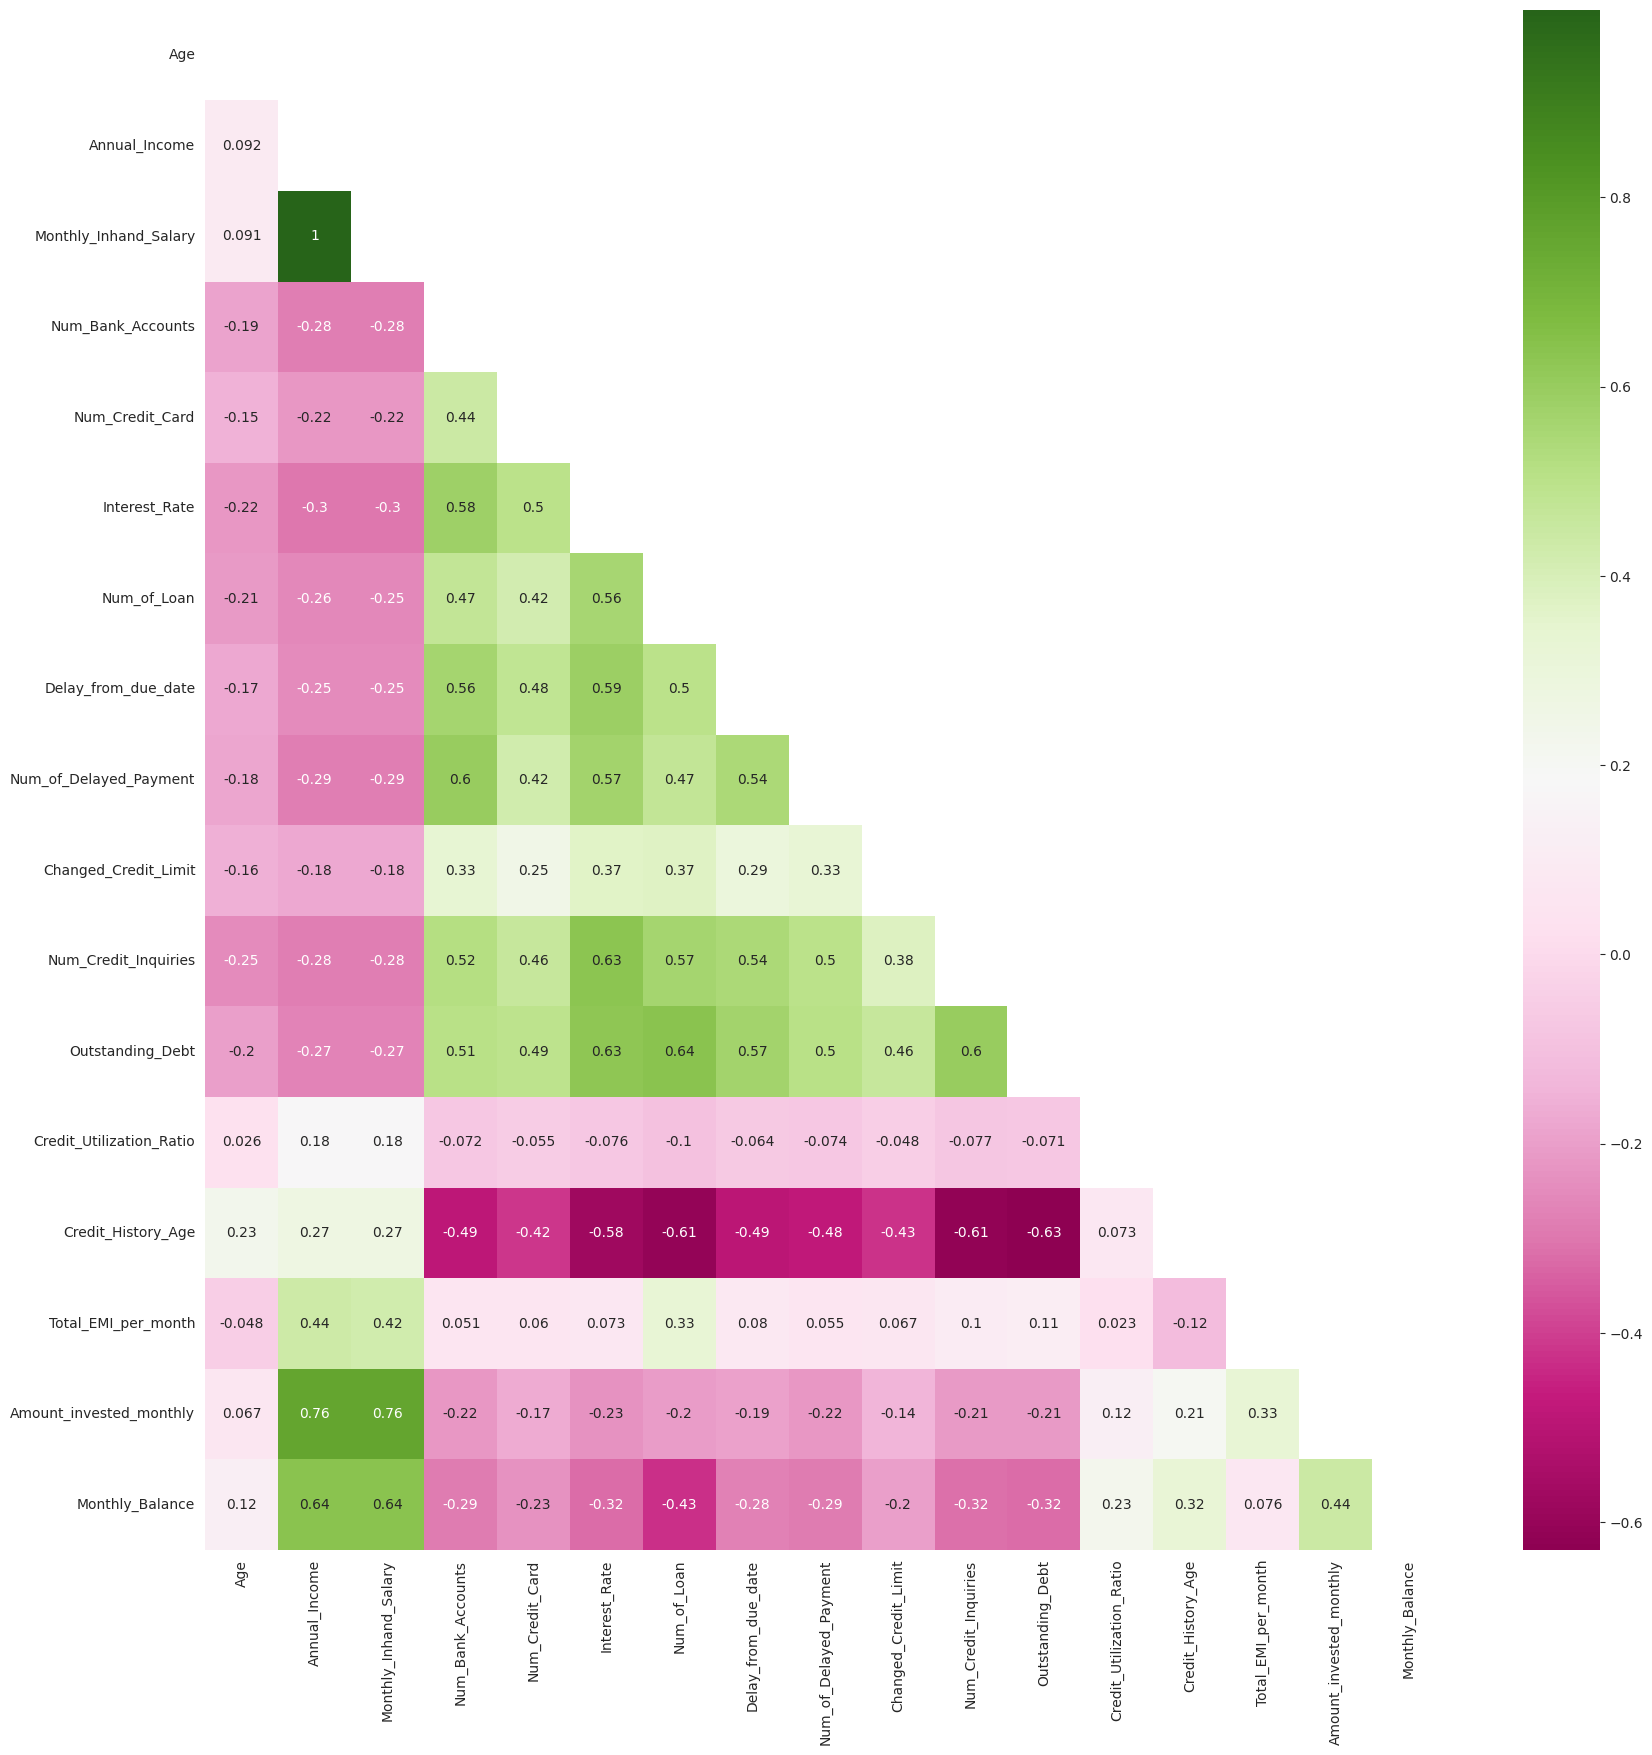

In [ ]:
# Correlation between Numerical features
plt.figure(figsize=(20, 20))
sns.heatmap(df.select_dtypes(include = "number").corr(),
            mask=np.triu(np.ones_like(df.select_dtypes(include = "number").corr(), dtype=bool)),
            annot=True, cmap="PiYG")
plt.show()

# Train - Test Split

In [ ]:
X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70000, 22)
(70000,)
(30000, 22)
(30000,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

should be used to encode target values, i.e. y, and not the input X.

# Converting categorical variables to numbers (one-hot encoding)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


In [ ]:
class GetDummies(BaseEstimator, TransformerMixin):
  def __init__(self, data_sep=',', col_name_sep='_'):
    self.data_sep     = data_sep
    self.col_name_sep = col_name_sep
  def fit(self,X,y = None):
    object_cols       = X.select_dtypes(include="object").columns
    self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
    self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2] for col in self.dummy_cols]

    for col, pre in zip(self.dummy_cols, self.dummy_prefix):
        dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

    dummy_X.drop(columns = self.dummy_cols, inplace=True)
    self.columns = dummy_X.columns
    return self
  def transform(self, X, y = None):
    for col, pre in zip(self.dummy_cols, self.dummy_prefix):
      X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))
    X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)
    return X_transformed
  def get_features_out(self,input_features=None):
    return self.columns.tolist()


In [ ]:
dummy = GetDummies()
X_train_dummy = dummy.fit_transform(X_train)
X_test_dummy   = dummy.transform(X_test)

In [ ]:
X_train_dummy.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,ToL_No Data,ToL_auto loan,ToL_credit-builder loan,ToL_debt consolidation loan,ToL_home equity loan,ToL_mortgage loan,ToL_not specified,ToL_payday loan,ToL_personal loan,ToL_student loan
76513,21.0,Manager,151649.36,12823.446667,3.0,7.0,11.0,3.0,7.0,14.0,0.48,3.0,Good,358.17,38.252928,359.0,No,224.703133,119.785966,Low_spent_Large_value_payments,564.160553,0,0,0,0,0,0,1,1,1,0
60406,26.0,Accountant,100465.14,8279.095000,4.0,3.0,11.0,0.0,3.0,14.0,13.16,2.0,Good,990.20,40.708250,393.0,No,0.000000,127.271779,High_spent_Large_value_payments,912.787408,1,0,0,0,0,0,0,0,0,0
27322,37.0,Engineer,43395.09,3562.257500,1.0,3.0,4.0,3.0,11.0,11.0,10.00,4.0,Good,1103.70,35.041464,391.0,NM,74.869250,39.602671,High_spent_Small_value_payments,362.544808,0,0,1,1,1,0,0,0,0,0
53699,34.0,Lawyer,80661.32,6551.776667,5.0,4.0,30.0,4.0,8.0,16.0,7.58,5.0,Standard,1482.15,33.109288,90.0,Yes,135.562474,80.217330,High_spent_Small_value_payments,547.480591,0,0,1,1,0,0,1,0,0,0
65412,43.0,Scientist,81506.32,7012.193333,7.0,4.0,7.0,2.0,9.0,13.0,11.02,5.0,Standard,933.67,27.513472,116.0,NM,92.506250,74.534002,High_spent_Small_value_payments,549.979234,0,0,0,0,0,1,1,0,0,0


In [ ]:
X_train_dummy.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'ToL_No Data', 'ToL_auto loan', 'ToL_credit-builder loan',
       'ToL_debt consolidation loan', 'ToL_home equity loan',
       'ToL_mortgage loan', 'ToL_not specified', 'ToL_payday loan',
       'ToL_personal loan', 'ToL_student loan'],
      dtype='object')

In [ ]:
X_train_dummy = X_train_dummy.reset_index(drop=True)
X_test_dummy = X_test_dummy.reset_index(drop=True)

In [ ]:
X_train_dummy.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'ToL_No Data', 'ToL_auto loan', 'ToL_credit-builder loan',
       'ToL_debt consolidation loan', 'ToL_home equity loan',
       'ToL_mortgage loan', 'ToL_not specified', 'ToL_payday loan',
       'ToL_personal loan', 'ToL_student loan'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat = X_train_dummy.select_dtypes(include="object").columns.tolist()
print('Features which requires OneHotEncoder:', cat)

Features which requires OneHotEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [ ]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# sparse_output=False then the output of fit_transform will be a numpy array which can be easily converted to dataframe

# sparse_output=True then the output of fit_transform will be a sparse matrix which cannot be easily converted to dataframe

# for example
# <38x4 sparse matrix of type '<class 'numpy.float64'>'
# 	with 38 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_cat = pd.DataFrame(ohe.fit_transform(X_train[cat]),columns=ohe.get_feature_names_out())


In [ ]:
X_train_cat.head()

,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_train_cat.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object')

In [ ]:
X_test_cat = pd.DataFrame(ohe.transform(X_test[cat]),columns=ohe.get_feature_names_out())


In [ ]:
X_train_ohe = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_test_ohe = X_test_cat.join(X_test_dummy.select_dtypes("number"))

In [ ]:
X_train_ohe.head()

,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,ToL_No Data,ToL_auto loan,ToL_credit-builder loan,ToL_debt consolidation loan,ToL_home equity loan,ToL_mortgage loan,ToL_not specified,ToL_payday loan,ToL_personal loan,ToL_student loan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.0,151649.36,12823.446667,3.0,7.0,11.0,3.0,7.0,14.0,0.48,3.0,358.17,38.252928,359.0,224.703133,119.785966,564.160553,0,0,0,0,0,0,1,1,1,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.0,100465.14,8279.095000,4.0,3.0,11.0,0.0,3.0,14.0,13.16,2.0,990.20,40.708250,393.0,0.000000,127.271779,912.787408,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37.0,43395.09,3562.257500,1.0,3.0,4.0,3.0,11.0,11.0,10.00,4.0,1103.70,35.041464,391.0,74.869250,39.602671,362.544808,0,0,1,1,1,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,34.0,80661.32,6551.776667,5.0,4.0,30.0,4.0,8.0,16.0,7.58,5.0,1482.15,33.109288,90.0,135.562474,80.217330,547.480591,0,0,1,1,0,0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43.0,81506.32,7012.193333,7.0,4.0,7.0,2.0,9.0,13.0,11.02,5.0,933.67,27.513472,116.0,92.506250,74.534002,549.979234,0,0,0,0,0,1,1,0,0,0


In [ ]:
X_train_ohe.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Nu

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train_scaled = sc.fit_transform(X_train_ohe)
X_test_scaled = sc.transform(X_test_ohe)

# Model Training

In [ ]:
rfc = RandomForestClassifier(random_state = 1337)

In [ ]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=1337)

In [ ]:
y_pred = rfc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.78      0.77      0.78      5322
        Poor       0.80      0.84      0.82      8805
    Standard       0.83      0.81      0.82     15873

    accuracy                           0.81     30000
   macro avg       0.80      0.81      0.81     30000
weighted avg       0.81      0.81      0.81     30000

